# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from os.path import join, basename, dirname
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)

4.5.5


# 경로

In [3]:
path_to_current = os.getcwd()
print(f'{path_to_current = }')

path_to_current = 'D:\\DACON_Anomoly'


# OpenCV
* 기초 강좌글: https://076923.github.io/posts/Python-opencv-1/

In [4]:
# image sample
path_to_samples = join(path_to_current, 'opencv_sample')
print(path_to_samples)

D:\DACON_Anomoly\opencv_sample


## 대칭(Flip, Symmetry)
* flipCode < 0: 원점 대칭
* flipCode = 0: X축 대칭
* flipCode > 0: Y축 대칭

In [5]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)
dst = cv2.flip(src, 1)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 회전(Rotate)

In [11]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)
print(src.shape)

height, width, channel = src.shape
center = (width/2, height/2)
matrix = cv2.getRotationMatrix2D(center,    # 중심축
                                 90,        # 회전각 (반시계)
                                 1)         # 비율(scale)
print('변환 행렬:\n', matrix)  # 변환 행렬

dst = cv2.warpAffine(src,                   # image path
                     matrix,                # 변환 행렬
                     (width, height))       # 출력 이미지 크기

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

(1024, 1024, 3)
변환 행렬:
 [[ 6.12323400e-17  1.00000000e+00 -5.68434189e-14]
 [-1.00000000e+00  6.12323400e-17  1.02400000e+03]]


## 이미지 피라미드(Image Pyramid)
- borderType : 테두리 외삽법 (https://076923.github.io/posts/Python-opencv-7/)
- 외삽법과 보간법의 의미 : https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=release&logNo=50094947851

In [12]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)
height, width, channel = src.shape

dst = cv2.pyrUp(src, dstsize=(width * 2, height * 2), borderType=cv2.BORDER_DEFAULT)    # 2배 확장
dst2 = cv2.pyrDown(src)                                                                 # 2배 축소

cv2.imshow("dst", dst)    # 확대
cv2.imshow("dst2", dst2)  # 축소
cv2.waitKey()
cv2.destroyAllWindows()

## 크기 조절(Resize)

In [13]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)

dst = cv2.resize(src, dsize=(640, 480), interpolation=cv2.INTER_AREA)                   # 원하는 절대 크기로 변환
dst2 = cv2.resize(src, dsize=(0, 0), fx=0.3, fy=0.7, interpolation=cv2.INTER_LINEAR)    # 원하는 상대 크기로 변환

cv2.imshow("dst", dst)
cv2.imshow("dst2", dst2)
cv2.waitKey()
cv2.destroyAllWindows()

## 자르기(Slice)

In [14]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)
dst = src[100:600, 200:700].copy()

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 얕은 복사(shallow copy), 깊은 복사(deep copy)
- 이미지를 자르거나 복사할 때, dst = src의 형태로 사용할 경우, 얕은 복사(shallow copy)가 되어 원본도 영향을 받게 됩니다. 그러므로, *.copy()를 이용해 깊은 복사(deep copy)를 진행합니다.



In [18]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)
dst = src[100:600, 200:700].copy()

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)

dst = src.copy()
roi = src[100:600, 200:700]  # 관심영역 설정
dst[0:500, 0:500] = roi

# cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 색상 공간 변환(Convert Color)

In [19]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)
dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 역상(Reverse Image)

In [20]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)
dst = cv2.bitwise_not(src)
# not 연산 이외에도 and, or, xor 연산이 존재합니다

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 이진화(Binary)

In [21]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, dst = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 흐림 효과

In [22]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)

dst = cv2.blur(src, (9, 9), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)
# cv2.blur(src, ksize, anchor, borderType), 
# ksize : 커널사이즈, anchor : 고정점, borderType : 테두리 외삽법

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 가장자리 검출

In [23]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
# dst = cv2.Sobel(src, ddepth, dx, dy, ksize, scale, delta, borderType)
# https://www.charlezz.com/?p=45153

laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3)
# dst = cv2.laplacian(src, ddepth, ksize, scale, delta, borderType)
# https://www.charlezz.com/?p=45203

canny = cv2.Canny(src, 100, 255)
# dst = cv2.Canny(src, threshold1, threshold2, apertureSize, L2gradient)
# https://www.charlezz.com/?p=45201

cv2.imshow("sobel", sobel)
cv2.imshow("laplacian", laplacian)
cv2.imshow("canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()

## HSV
* Hue: 색상
* Saturation: 채도
* Value: 명도

In [26]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)    # numpy array

cv2.imshow("h", h)
cv2.imshow("s", s)
cv2.imshow("v", v)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
print(f'{h.shape = }\n{s.shape = }\n{v.shape = }')

h.shape = (1024, 1024)
s.shape = (1024, 1024)
v.shape = (1024, 1024)


### 특정색 추출
- https://copycoding.tistory.com/156

In [28]:
src = cv2.imread(join(path_to_samples, '10000.png'), cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 8, 20)
orange = cv2.bitwise_and(hsv, hsv, mask = h)  # mask가 있다면 mask영역만 bitwise and 연산을 함
orange = cv2.cvtColor(orange, cv2.COLOR_HSV2BGR)

cv2.imshow("orange", orange)
cv2.waitKey()
cv2.destroyAllWindows()

### RGB -> HSV 좌표변환

In [5]:
color = [255,0,0] # 파란색
pixel = np.uint8([[color]])
hsv = cv2.cvtColor(pixel, cv2.COLOR_BGR2HSV)
print(hsv)
h, s, v = cv2.split(hsv)
h, s, v

[[[120 255 255]]]


(array([[120]], dtype=uint8),
 array([[255]], dtype=uint8),
 array([[255]], dtype=uint8))

### 클릭으로 비슷한 색 찾기
* https://www.youtube.com/watch?v=HGhj0Uef8K4
* https://webnautes.tistory.com/m/1246

- RGB형태에서는 특정 색을 추출하는 것이 어렵다. => HSV색공간으로 바꾸어 H(색상)영역에서 특정 색의 범위를 정해 추출
> - H : 0-360도로 나타내는데 uint8 image에서 0-255까지만 표현가능하므로 절반인 0~179를 사용
> - S : 0-100% => 0-255
> - V : 0-100% => 0-255

---
- cv2.event
- https://deep-learning-study.tistory.com/110

In [7]:
img_color = cv2.imread(join(path_to_samples,'1.jpg'), cv2.IMREAD_COLOR)
height,width = img_color.shape[:2]

img_hsv = cv2.cvtColor(img_color,cv2.COLOR_BGR2HSV)

lower_blue = (120-10,30,30)  # 30,30은 S(채도)가 너무 낮아져 너무 하얗게 보이지않을 정도의 기준과 V(명도)가 낮아서 검은 색으로 보이지 않을 정도의 기준
upper_blue = (120+10,255,255)
img_mask = cv2.inRange(img_hsv,lower_blue,upper_blue)

img_result = cv2.bitwise_and(img_color,img_color,mask = img_mask)

cv2.imshow('img_color',img_color)
cv2.imshow('img_mask',img_mask)
cv2.imshow('img_result',img_result)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np

hsv = 0
lower_blue1 = 0
upper_blue1 = 0
lower_blue2 = 0
upper_blue2 = 0
lower_blue3 = 0
upper_blue3 = 0


def mouse_callback(event, x, y, flags, param):
    global hsv, lower_blue1, upper_blue1, lower_blue2, upper_blue2, lower_blue3, upper_blue3

    # 마우스 왼쪽 버튼 누를시 위치에 있는 픽셀값을 읽어와서 HSV로 변환합니다.
    if event == cv2.EVENT_LBUTTONDOWN:
        print(img_color[y, x])   # opencv는 픽셀좌표를 row(y),column(x)순으로 읽음, 클릭한 픽셀의 RGB를 반환
        color = img_color[y, x]

        one_pixel = np.uint8([[color]])
        hsv = cv2.cvtColor(one_pixel, cv2.COLOR_BGR2HSV)
        hsv = hsv[0][0]

        # HSV 색공간에서 마우스 클릭으로 얻은 픽셀값과 유사한 필셀값의 범위를 정합니다.
        # 해당 pixel의 H값에서 -10~+10까지 색을 추출하도록 mask지정
        if hsv[0] < 10:
            print("case1")
            lower_blue1 = np.array([hsv[0]-10+180, 30, 30])
            upper_blue1 = np.array([180, 255, 255])
            lower_blue2 = np.array([0, 30, 30])
            upper_blue2 = np.array([hsv[0], 255, 255])
            lower_blue3 = np.array([hsv[0], 30, 30])
            upper_blue3 = np.array([hsv[0]+10, 255, 255])
            #     print(i-10+180, 180, 0, i)
            #     print(i, i+10)

        elif hsv[0] > 170:
            print("case2")
            lower_blue1 = np.array([hsv[0], 30, 30])
            upper_blue1 = np.array([180, 255, 255])
            lower_blue2 = np.array([0, 30, 30])
            upper_blue2 = np.array([hsv[0]+10-180, 255, 255])
            lower_blue3 = np.array([hsv[0]-10, 30, 30])
            upper_blue3 = np.array([hsv[0], 255, 255])
            #     print(i, 180, 0, i+10-180)
            #     print(i-10, i)
        else:
            print("case3")
            lower_blue1 = np.array([hsv[0], 30, 30])
            upper_blue1 = np.array([hsv[0]+10, 255, 255])
            lower_blue2 = np.array([hsv[0]-10, 30, 30])
            upper_blue2 = np.array([hsv[0], 255, 255])
            lower_blue3 = np.array([hsv[0]-10, 30, 30])
            upper_blue3 = np.array([hsv[0], 255, 255])
            #     print(i, i+10)
            #     print(i-10, i)

        print(hsv[0])
        print("@1", lower_blue1, "~", upper_blue1)
        print("@2", lower_blue2, "~", upper_blue2)
        print("@3", lower_blue3, "~", upper_blue3)

cv2.namedWindow('img_color')
cv2.setMouseCallback('img_color', mouse_callback)

while(True):
    img_color = cv2.imread(join(path_to_samples, 'tomato.webp'))
    # height, width = img_color.shape[:2]
    height, width = (200, 600)
    img_color = cv2.resize(img_color, (width, height), interpolation=cv2.INTER_AREA)

    # 원본 영상을 HSV 영상으로 변환합니다.
    img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

    # 범위 값으로 HSV 이미지에서 마스크를 생성합니다.
    img_mask1 = cv2.inRange(img_hsv, lower_blue1, upper_blue1)
    img_mask2 = cv2.inRange(img_hsv, lower_blue2, upper_blue2)
    img_mask3 = cv2.inRange(img_hsv, lower_blue3, upper_blue3)
    img_mask = img_mask1 | img_mask2 | img_mask3


    # 마스크 이미지로 원본 이미지에서 범위값에 해당되는 영상 부분을 획득합니다.
    img_result = cv2.bitwise_and(img_color, img_color, mask=img_mask)


    cv2.imshow('img_color', img_color)
    cv2.imshow('img_mask', img_mask)
    cv2.imshow('img_result', img_result)


    # ESC 키누르면 종료
    if cv2.waitKey(1) & 0xFF == 27:
        break


cv2.destroyAllWindows()

[  7 142 157]
case3
27
@1 [27 30 30] ~ [ 37 255 255]
@2 [17 30 30] ~ [ 27 255 255]
@3 [17 30 30] ~ [ 27 255 255]
[  8 147 161]
case3
27
@1 [27 30 30] ~ [ 37 255 255]
@2 [17 30 30] ~ [ 27 255 255]
@3 [17 30 30] ~ [ 27 255 255]
[  3  70 221]
case1
9
@1 [179  30  30] ~ [180 255 255]
@2 [ 0 30 30] ~ [  9 255 255]
@3 [ 9 30 30] ~ [ 19 255 255]
[ 15  14 151]
case1
0
@1 [170  30  30] ~ [180 255 255]
@2 [ 0 30 30] ~ [  0 255 255]
@3 [ 0 30 30] ~ [ 10 255 255]
[26 65  9]
case3
69
@1 [69 30 30] ~ [ 79 255 255]
@2 [59 30 30] ~ [ 69 255 255]
@3 [59 30 30] ~ [ 69 255 255]


KeyboardInterrupt: 

# cable 데이터를 비슷한 색으로 분리하기

## 데이터 불러오기

In [5]:
path_to_current = os.getcwd()
path_to_dataset = join(path_to_current, 'data')
print(f'{path_to_current = }')

path_to_current = 'D:\\DACON_Anomoly'


In [6]:
df = pd.read_csv(join(path_to_dataset, 'train_df.csv'), index_col=['index'])
df = df[df['class'] == 'cable']     # class: cable
df = df[df['state'] != 'combined']  # state: not combined

display(df)

,file_name,class,state,label
index,,,,
8,10008.png,cable,bent_wire,cable-bent_wire
14,10014.png,cable,good,cable-good
32,10032.png,cable,good,cable-good
38,10038.png,cable,good,cable-good
39,10039.png,cable,good,cable-good
...,...,...,...,...
4201,14201.png,cable,good,cable-good
4207,14207.png,cable,good,cable-good
4212,14212.png,cable,good,cable-good


In [7]:
# 절대 경로로 변환
df.file_name = df.file_name.apply(lambda path: join(path_to_dataset, 'train', path))

# state numbering
categories = {state:i for i, state in enumerate(df['state'].unique())}
print(f"{categories = }")

# state: str -> int
# df['state'] = df['state'].apply(lambda state: categories[state])

display(df)

categories = {'bent_wire': 0, 'good': 1, 'missing_cable': 2, 'cut_outer_insulation': 3, 'cut_inner_insulation': 4, 'missing_wire': 5, 'cable_swap': 6, 'poke_insulation': 7}


,file_name,class,state,label
index,,,,
8,D:\DACON_Anomoly\data\train\10008.png,cable,bent_wire,cable-bent_wire
14,D:\DACON_Anomoly\data\train\10014.png,cable,good,cable-good
32,D:\DACON_Anomoly\data\train\10032.png,cable,good,cable-good
38,D:\DACON_Anomoly\data\train\10038.png,cable,good,cable-good
39,D:\DACON_Anomoly\data\train\10039.png,cable,good,cable-good
...,...,...,...,...
4201,D:\DACON_Anomoly\data\train\14201.png,cable,good,cable-good
4207,D:\DACON_Anomoly\data\train\14207.png,cable,good,cable-good
4212,D:\DACON_Anomoly\data\train\14212.png,cable,good,cable-good


In [8]:
# state별 이미지 수 확인
for state in categories:
    print(f'{state}: {np.sum(df.state == state)}')

bent_wire: 7
good: 224
missing_cable: 6
cut_outer_insulation: 5
cut_inner_insulation: 7
missing_wire: 5
cable_swap: 6
poke_insulation: 5


## 원하는 부분만 추출하기

In [9]:
# sample image
filename = '10158.png'
image = join(path_to_dataset, 'train', filename)

### 케이블 청색

In [10]:
src = cv2.imread(image, cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 107, 125)

dst = cv2.bitwise_and(hsv, hsv, mask = h)
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 케이블 녹색

In [13]:
src = cv2.imread(image, cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 25, 80)
s = cv2.inRange(s, 50, 255)

dst = cv2.bitwise_and(hsv, hsv, mask = h)
dst = cv2.bitwise_and(dst, dst, mask = s)
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 케이블 갈색

In [12]:
src = cv2.imread(image, cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 10, 110)
v = cv2.inRange(v, 70, 140)
s = cv2.inRange(s, 0, 40)

dst = cv2.bitwise_and(hsv, hsv, mask = h)
dst = cv2.bitwise_and(dst, dst, mask = v)
dst = cv2.bitwise_and(dst, dst, mask = s)
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 케이블 외피

In [14]:
src = cv2.imread(image, cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 90, 105)
v = cv2.inRange(v, 150, 255)
dst = cv2.bitwise_and(hsv, hsv, mask = h)
dst = cv2.bitwise_and(dst, dst, mask = v)
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 케이블 와이어(심)

In [15]:
# 와이어 결함 데이터
mask = df.state == 'bent_wire'
image = df[mask].iloc[1].file_name
print(image)

D:\DACON_Anomoly\data\train\11086.png


In [16]:
src = cv2.imread(image, cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 0, 20) + cv2.inRange(h, 170, 180)
v = cv2.inRange(v, 30, 255)
s = cv2.inRange(s, 0, 10) + cv2.inRange(s, 60, 200)

dst = cv2.bitwise_and(hsv, hsv, mask = h)
dst = cv2.bitwise_and(dst, dst, mask = v)
dst = cv2.bitwise_and(dst, dst, mask = s)
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 노이즈 제거(침식, 팽창)
* 침식
* 팽창
* 열림, 닫힘 등등
  * https://bkshin.tistory.com/entry/OpenCV-19-%EB%AA%A8%ED%8F%B4%EB%A1%9C%EC%A7%80Morphology-%EC%97%B0%EC%82%B0-%EC%B9%A8%EC%8B%9D-%ED%8C%BD%EC%B0%BD-%EC%97%B4%EB%A6%BC-%EB%8B%AB%ED%9E%98-%EA%B7%B8%EB%A0%88%EB%94%94%EC%96%B8%ED%8A%B8-%ED%83%91%ED%96%87-%EB%B8%94%EB%9E%99%ED%96%87

### 열림

In [17]:
src = cv2.imread(r'D:\DACON_Anomoly\data\train\11086.png', cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 0, 20) + cv2.inRange(h, 170, 180)
v = cv2.inRange(v, 30, 255)
s = cv2.inRange(s, 0, 10) + cv2.inRange(s, 60, 200)

dst = cv2.bitwise_and(hsv, hsv, mask = h)
dst = cv2.bitwise_and(dst, dst, mask = v)
dst = cv2.bitwise_and(dst, dst, mask = s)

dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, k)

merged = np.hstack((dst, opening))
cv2.imshow('Erode', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 케이블 이미지를 5개의 채널로 분리하기

### 함수 생성

In [18]:
def cable2array(image):
    src = cv2.imread(image, cv2.IMREAD_COLOR)
    width, height = 500, 500
    src = cv2.resize(src, (width, height), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    channels = []
    
    # 청색 케이블
    h_ = cv2.inRange(h, 107, 125)
    
    dst = cv2.bitwise_and(hsv, hsv, mask = h_)
    dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    
    channels.append(dst)
    
    # 녹색 케이블
    h_ = cv2.inRange(h, 25, 80)
    s_ = cv2.inRange(s, 50, 255)

    dst = cv2.bitwise_and(hsv, hsv, mask = h_)
    dst = cv2.bitwise_and(dst, dst, mask = s_)
    dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    
    channels.append(dst)
    
    # 갈색 케이블
    h_ = cv2.inRange(h, 10, 110)
    v_ = cv2.inRange(v, 70, 140)
    s_ = cv2.inRange(s, 0, 40)

    dst = cv2.bitwise_and(hsv, hsv, mask = h_)
    dst = cv2.bitwise_and(dst, dst, mask = v_)
    dst = cv2.bitwise_and(dst, dst, mask = s_)
    dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    
    channels.append(dst)
    
    # 케이블 외피
    h_ = cv2.inRange(h, 90, 105)
    v_ = cv2.inRange(v, 150, 255)
    
    dst = cv2.bitwise_and(hsv, hsv, mask = h_)
    dst = cv2.bitwise_and(dst, dst, mask = v_)
    dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    
    channels.append(dst)
    
    # 케이블 와이어(심)
    h_ = cv2.inRange(h, 0, 20) + cv2.inRange(h, 170, 180)
    v_ = cv2.inRange(v, 30, 255)
    s_ = cv2.inRange(s, 0, 10) + cv2.inRange(s, 60, 200)

    dst = cv2.bitwise_and(hsv, hsv, mask = h_)
    dst = cv2.bitwise_and(dst, dst, mask = v_)
    dst = cv2.bitwise_and(dst, dst, mask = s_)
    dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    
    channels.append(dst)
    
    # 채널 합치기
    r = np.stack(channels, axis=-1)
    
    # 열림
    # k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    # r = cv2.morphologyEx(r, cv2.MORPH_OPEN, k)

    return r

### 이미지 출력

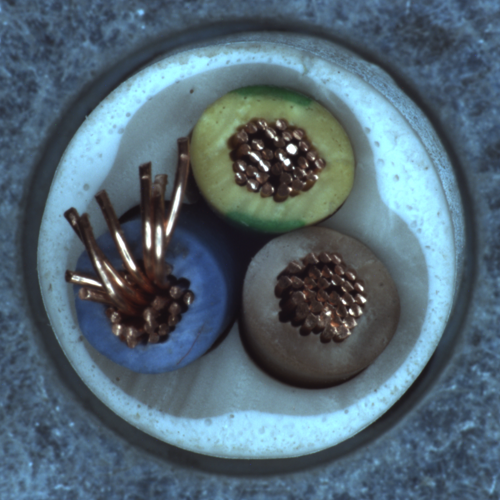

(500, 500, 5)


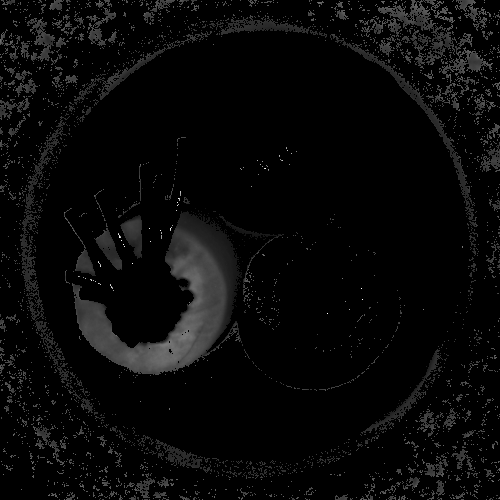

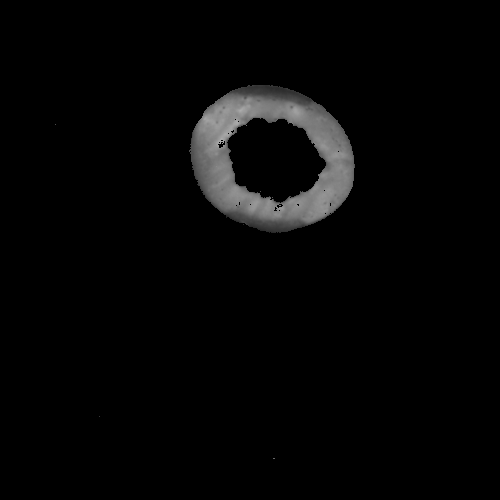

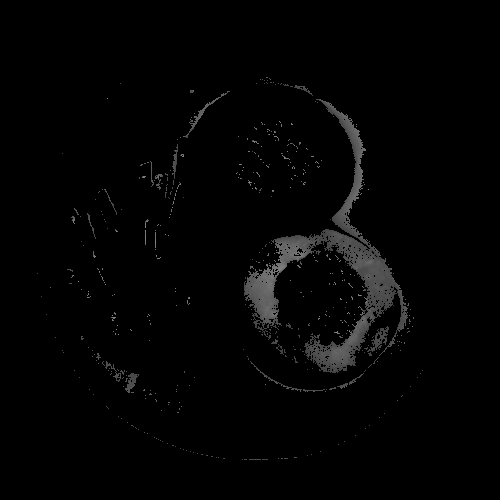

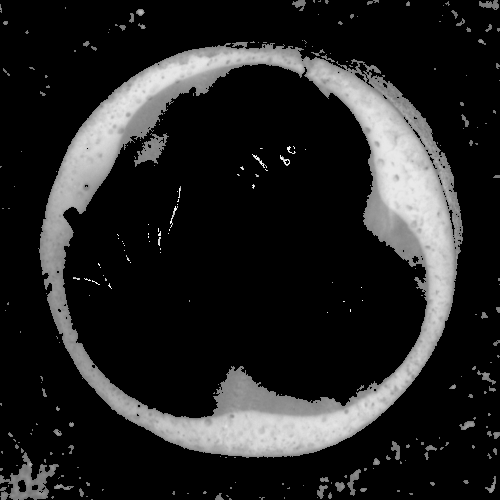

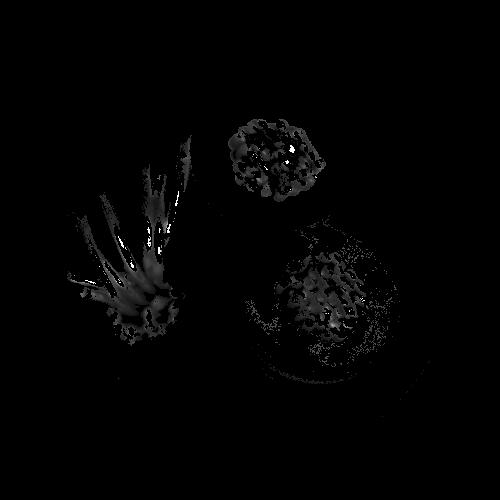

In [20]:
display(Image.open(image).resize((500, 500)))
dst = cable2array(image)
print(dst.shape)
for i in range(5):
    display(Image.fromarray(dst[:, :, i]))

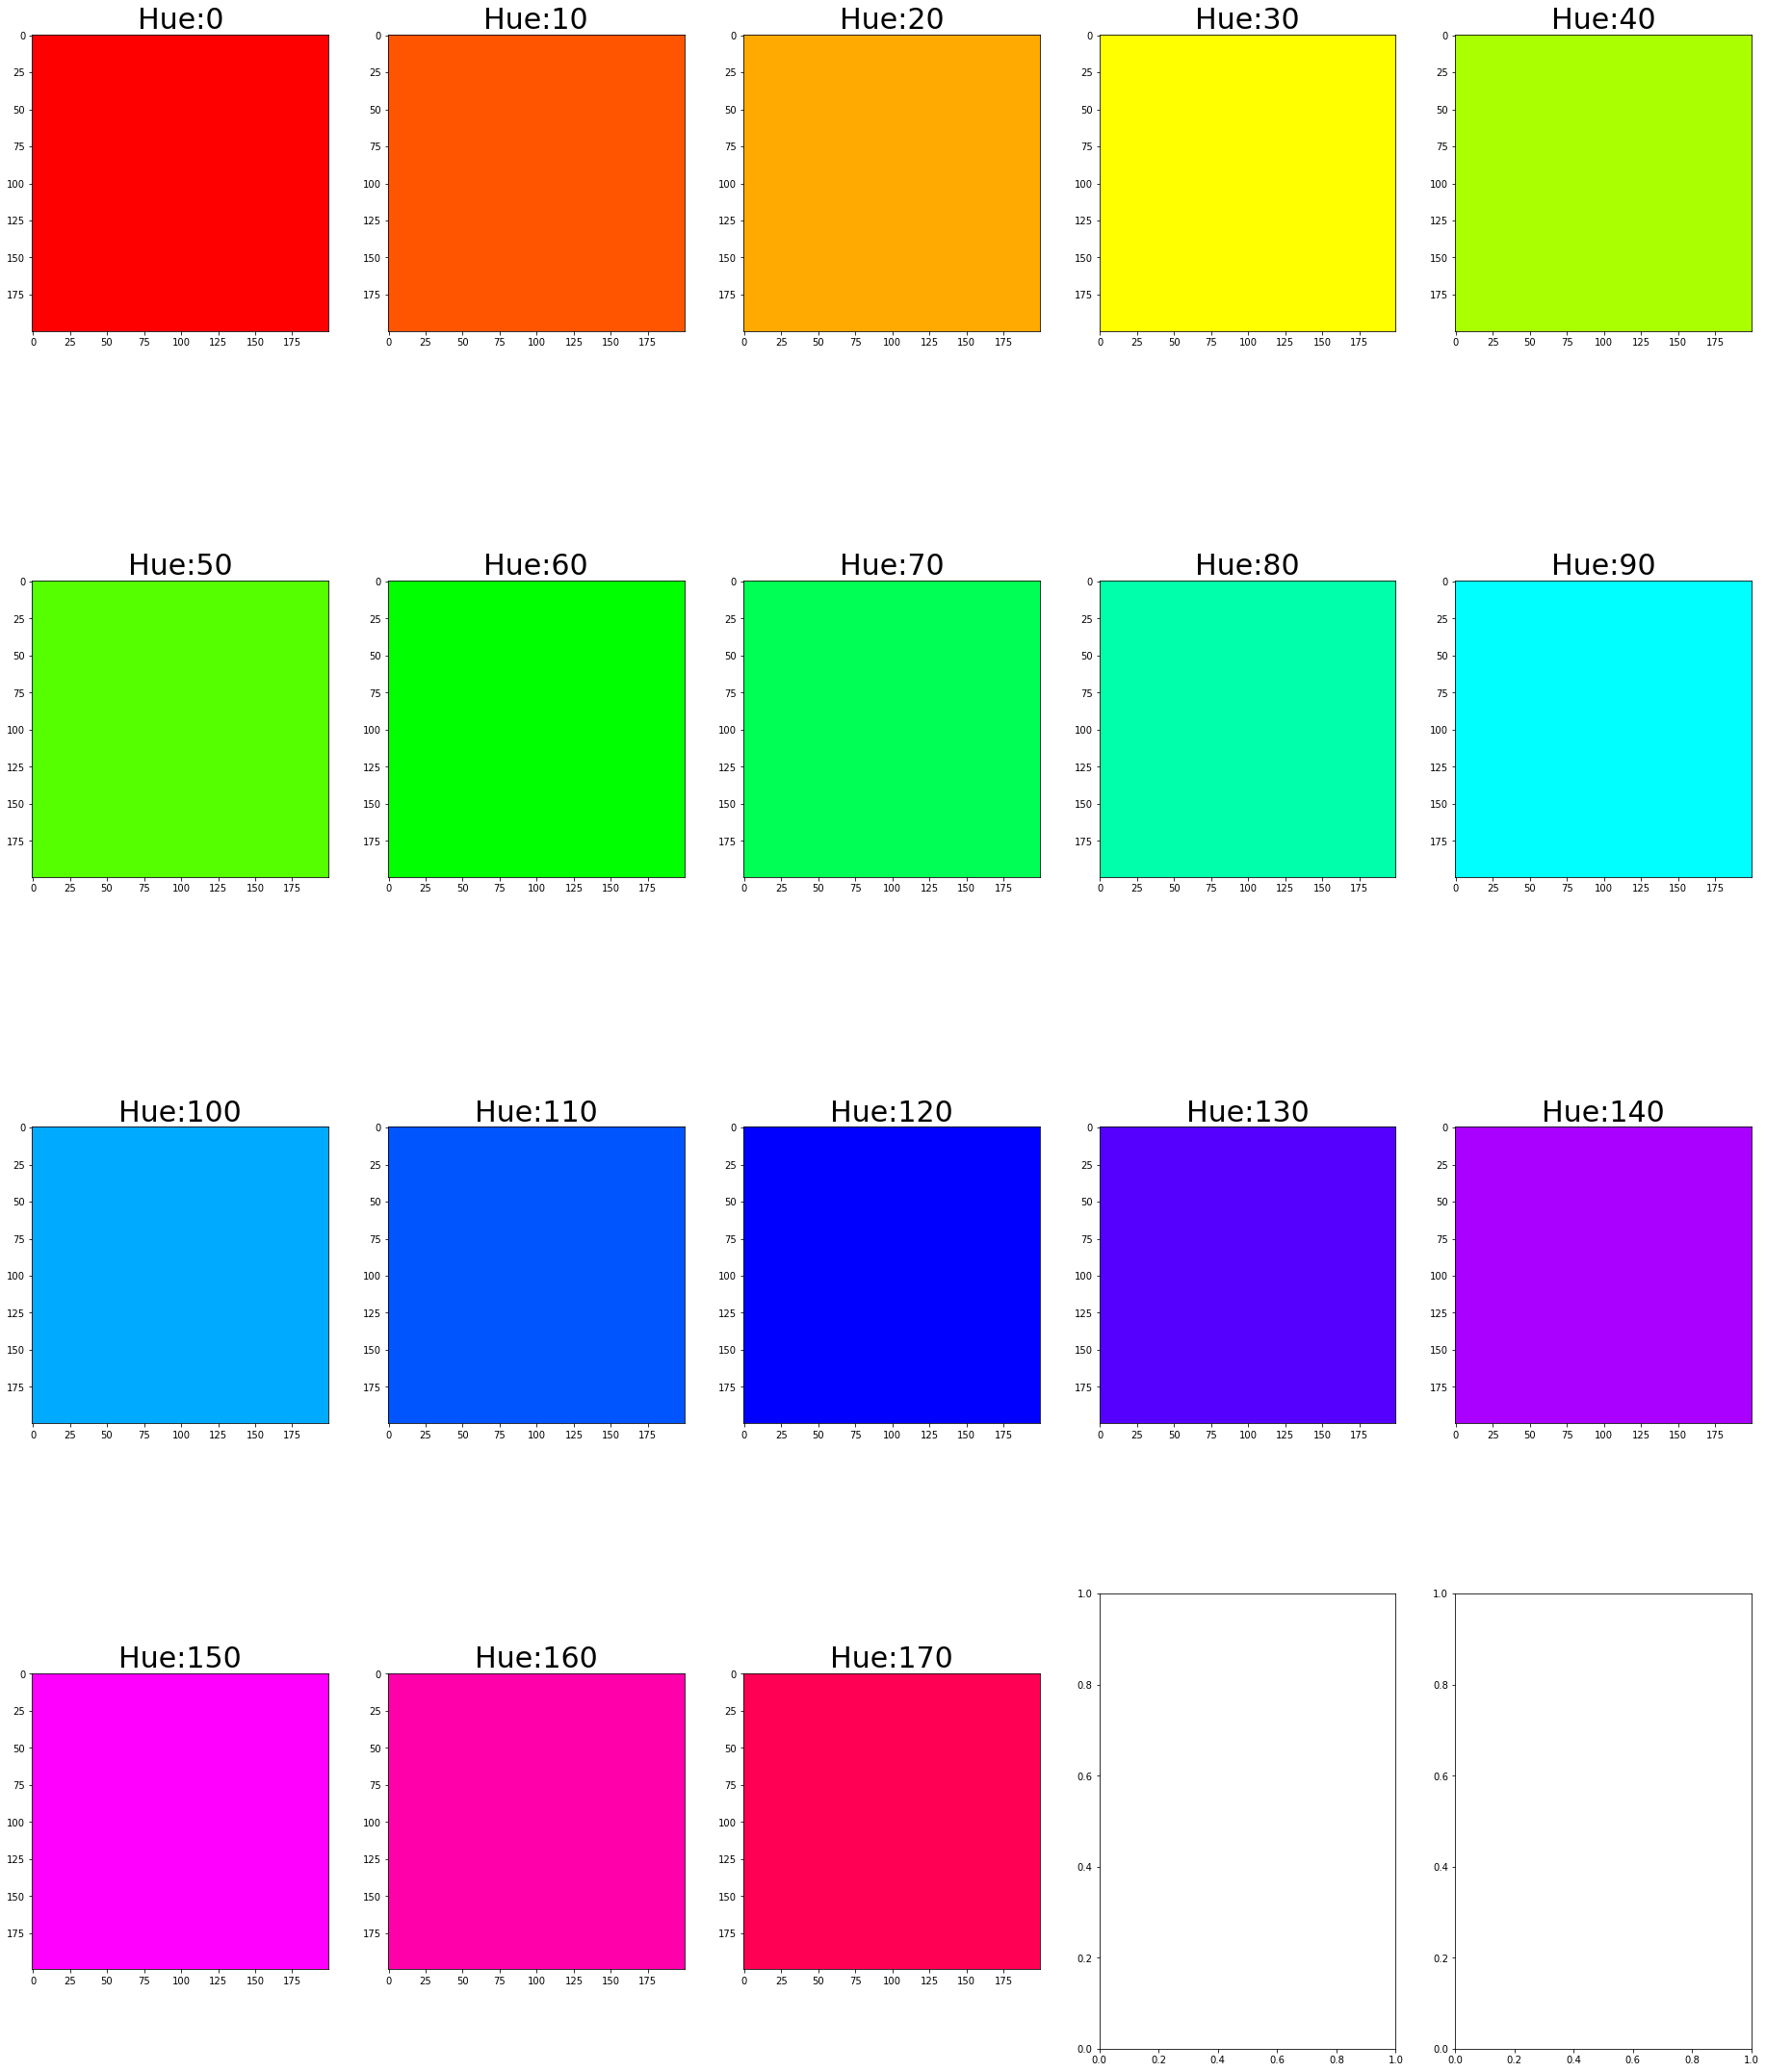

In [21]:
lst = range(0,180,10)
fig,axes = plt.subplots(4,5,facecolor='white', figsize=(32,40))

for i,num in enumerate(lst):
    ax = axes.ravel()[i]
    pixel = np.uint8([[[num,255,255]]])
    p_bgr = cv2.cvtColor(pixel,cv2.COLOR_HSV2BGR)
    img_color = cv2.resize(p_bgr, (200,200), interpolation=cv2.INTER_AREA)
    img_color = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
    ax.imshow(img_color)
    ax.set_title('Hue:'+str(num),size=30)

plt.show()
